In [25]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Reading the data set 
df = pd.read_csv('accepted_2007_to_2018Q4.csv',low_memory=False)

In [27]:
# Loan status entries 
df = df.loc[(df['loan_status'] == 'Charged Off') | (df['loan_status'] == 'Fully Paid')]

In [28]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,68426831,NaN,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.shape

(1345310, 151)

In [9]:
# Summary statistics for numeric variables
numeric_vars = ['total_acc']
print("\nSummary statistics for numeric variables:")
df[numeric_vars].groupby(df['loan_status']).describe()


Summary statistics for numeric variables:


total_acc                                                    
                 count       mean        std  min   25%   50%   75%    max
loan_status                                                               
Charged Off   268559.0  24.709356  12.117364  2.0  16.0  23.0  31.0  176.0
Fully Paid   1076751.0  25.048551  11.967683  2.0  16.0  23.0  32.0  162.0

In [13]:
# Check for missing values
print("\nMissing values:")
df.isnull().sum()


Missing values:


id                             0
member_id                1345310
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
                          ...   
settlement_status        1312034
settlement_date          1312034
settlement_amount        1312034
settlement_percentage    1312034
settlement_term          1312034
Length: 151, dtype: int64

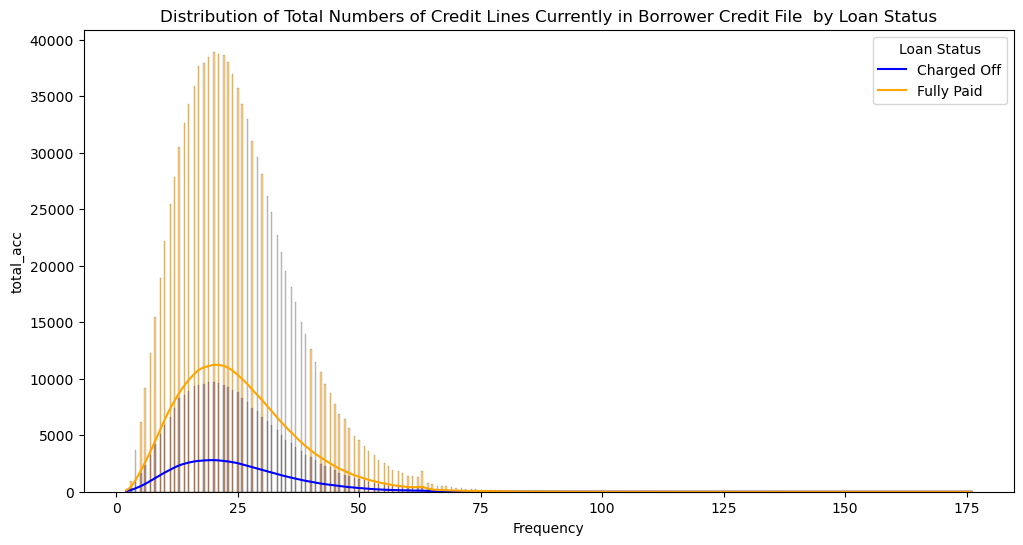

In [74]:
# Data visualization

#Distribution of total numbers of credit lines currently in borrower's credit file by loan status
plt.figure(figsize=(12, 6))
sns.histplot(df, x='total_acc', hue='loan_status', kde=True, palette={'Charged Off': 'blue', 'Fully Paid': 'orange'}, legend=True)
plt.title('Distribution of Total Numbers of Credit Lines Currently in Borrower Credit File  by Loan Status')
plt.xlabel('Frequency')
plt.ylabel('total_acc')
plt.legend(title='Loan Status', labels=['Charged Off', 'Fully Paid'])
plt.show()

The distribution of fully paid loans is higher across all frequencies compared to charged-off loans, indicating that there are more fully paid accounts than charged-off accounts in the dataset.
The frequency of both loan statuses decreases as the number of credit lines increases, showing a right-skewed distribution.

<function matplotlib.pyplot.show(close=None, block=None)>

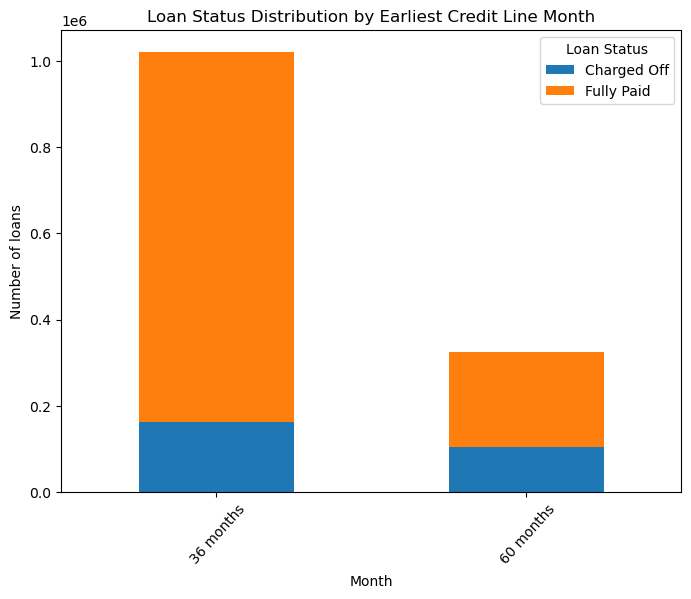

In [76]:
pivot_table = df.pivot_table(index='term', columns='loan_status', aggfunc='size', fill_value=0)

pivot_table.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Loan Status Distribution by Earliest Credit Line Month')
plt.ylabel('Number of loans')
plt.xlabel('Month')
plt.xticks(rotation=48)  
plt.legend(title='Loan Status')
plt.show

The data suggests that borrowers with a longer history of credit (36 months) are more likely to have fully paid off their loans than those with a shorter credit history (60 months).
It also implies that a shorter credit history is associated with a higher proportion of charged-off loans relative to fully paid ones, compared to borrowers with a longer credit history.

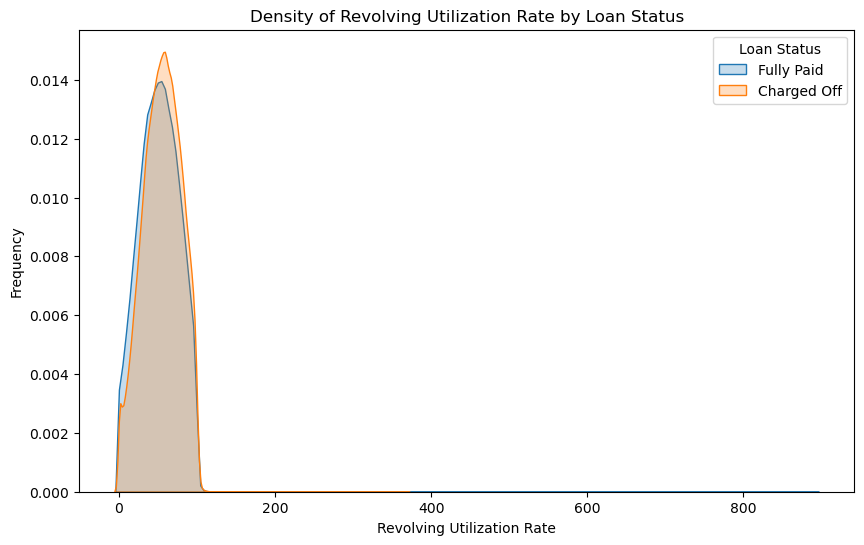

In [58]:
plt.figure(figsize=(10, 6))
for status in df['loan_status'].unique():
    subset = df[df['loan_status'] == status]
    sns.kdeplot(subset['revol_util'], label=status, fill=True)

plt.title('Density of Revolving Utilization Rate by Loan Status')
plt.xlabel('Revolving Utilization Rate')
plt.ylabel('Frequency')
plt.legend(title='Loan Status')
plt.show()

The density curves are sharp and peak at a low revolving utilization rate, suggesting that most borrowers, regardless of loan status, have low utilization rates.
The graph suggests that most borrowers with either loan status tend to have a lower revolving utilization rate, and there is a presence of borrowers with high utilization rates although they are less common. It also hints that having a lower revolving utilization rate could be associated with a higher likelihood of fully paying off a loan.

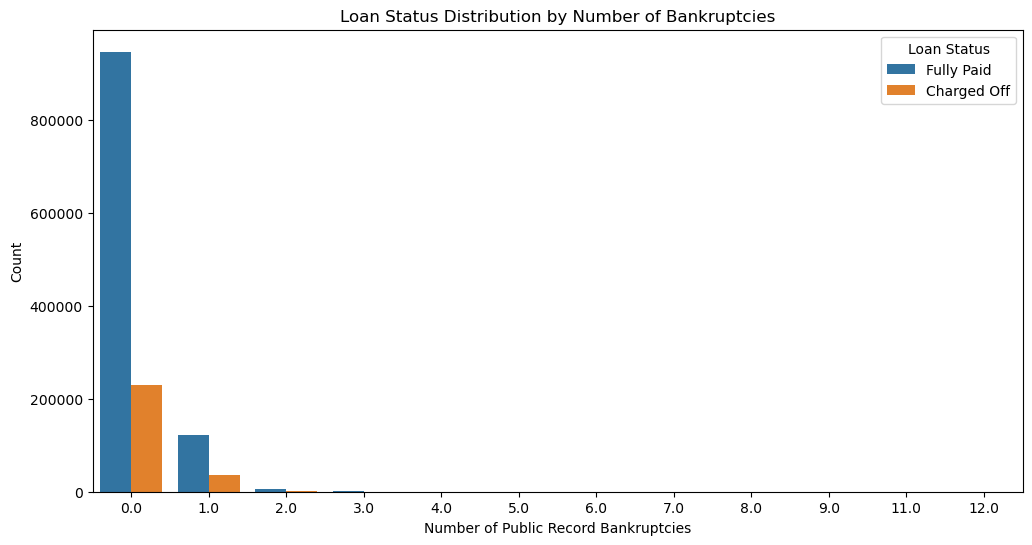

In [60]:
plt.figure(figsize=(12, 6))
sns.countplot(x='pub_rec_bankruptcies', hue='loan_status', data=df)
plt.title('Loan Status Distribution by Number of Bankruptcies')
plt.xlabel('Number of Public Record Bankruptcies')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

The data indicates that borrowers with no public record of bankruptcy are more likely to fully pay off their loans, and the likelihood of both fully paying a loan and having a loan charged off decreases as the number of bankruptcies increases. This suggests that bankruptcy is a strong indicator of loan repayment risk.
For borrowers with one bankruptcy, there are still more fully paid loans than charged off, but the number of loans is significantly lower compared to borrowers with no bankruptcies.
As the number of bankruptcies increases to two or more, the number of loans drops drastically and becomes minimal.

In [77]:
df_co = df[df['loan_status'] == 'Charged Off'].groupby('pub_rec_bankruptcies').count()[['loan_status']]

df_total = df.groupby('pub_rec_bankruptcies').count()[['loan_status']]

percent_co = df_co / df_total * 100

percent_co.rename(columns={'loan_status': 'Percentage Charged Off Loans'}).reset_index()

,pub_rec_bankruptcies,Percentage Charged Off Loans
0,0.0,19.581411
1,1.0,22.526887
2,2.0,24.790835
3,3.0,22.615287
4,4.0,27.777778
5,5.0,23.404255
6,6.0,34.782609
7,7.0,26.666667
8,8.0,44.444444
9,9.0,33.333333


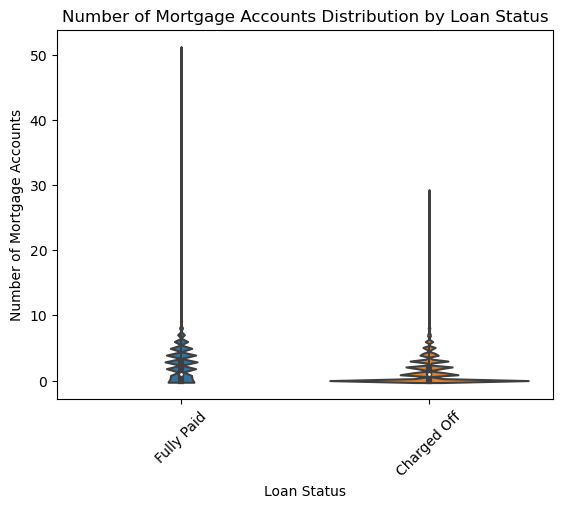

In [72]:
sns.violinplot(x='loan_status', y='mort_acc', data=df)
plt.title('Number of Mortgage Accounts Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Mortgage Accounts')
plt.xticks(rotation=45)
plt.show()

Both distributions are relatively peaked around the lower end, which means most borrowers have a small number of mortgage accounts.
For "Fully Paid" loans, the distribution is wider and has a longer tail, indicating a broader range of the number of mortgage accounts.
The "Charged Off" loans have a narrower distribution, suggesting that there is less variability in the number of mortgage accounts among borrowers who have defaulted.

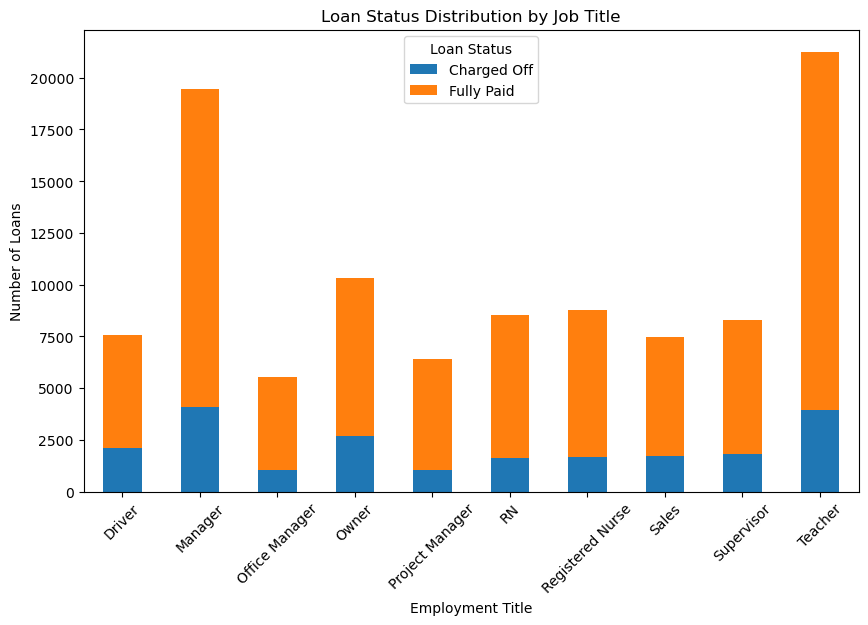

In [56]:
top_job_titles = df['emp_title'].value_counts().nlargest(10).index
filtered_df = df[df['emp_title'].isin(top_job_titles)]

# Creating a crosstab or pivot table for plotting
pivot_table = pd.crosstab(index=filtered_df['emp_title'], columns=filtered_df['loan_status'])

pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Loan Status Distribution by Job Title')
plt.xlabel('Employment Title')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()


The data suggests that certain professions, like "Teacher" and "Manager," may have a higher number of loans but also a higher rate of fully paying them off. In contrast, other professions like "Driver" and "Registered Nurse" have fewer loans in this dataset. This could potentially inform financial institutions about the loan repayment patterns associated with different employment titles.